<a href="https://colab.research.google.com/github/tanyasosa/SeriesDeTiempo_TSC_A01177961/blob/main/Sesion3_TSC_A01177961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de tiempo
## Tanya Sosa Cavazos
### Sesión 3 - 21 feb 2023

Recuerdas que nuestra última sesión abordamos el tema de intervalos de confianza. Retomaremos el tema de prueba de hipótesis. 

Para eso descargamos datos del precio de las acciones de Wal-mart México y calculamos su retorno

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 12.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import yfinance as yf

In [ ]:
walmex = yf.download('WALMEX.MX', 
                       start='2014-01-01', 
                       end='2017-12-31',
                       progress=False)

volvemos a calcular los retornos

$return = \frac{P_{hoy}-P_{ayer}} {p_{ayer}} $

In [ ]:
walmex['return'] = walmex['Adj Close'].pct_change()

Realizamos su histograma

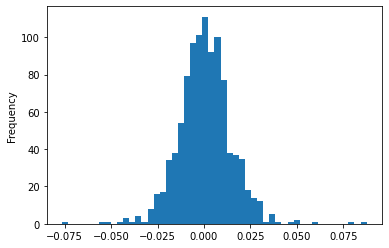

In [ ]:
walmex['return'].plot.hist(bins=50)

calculamos el retorno promedio

In [ ]:
walmex['return'].mean().round(5)

0.00062

Vamos a probar la siguiente hipótesis:

 el rendimiento de las acciones de walmart es 0.0006

$H_0: \mu=0.0006$

$H_a: \mu \neq 0.0006$


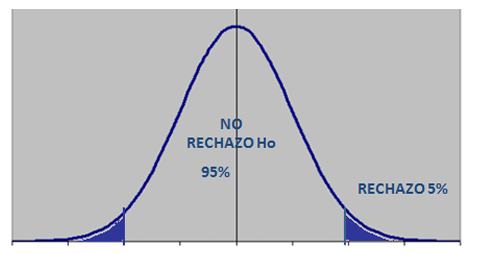

Calculamos el estadístico de prueba

estadistico de prueba $\frac{\bar{x}-h_o}{\sigma/\sqrt{n}}$

In [ ]:
## primeros los datos
media = walmex['return'].mean()
media_ho = 0.0006
desv_est = walmex['return'].std(ddof=1)
n = 1005
raiz_n = n**0.5

In [ ]:
# ahora el estadístico
estadistico_z = (media-media_ho) / (desv_est / raiz_n)

In [ ]:
estadistico_z

0.05419044907787356

Por el valor del estadistico prueba no rechazamos Ho, 0.006 es un valor posible del verdadero rendimiento (return) promedio de las acciónes de WalMart México.

por último calculamos el p-value de la prueba

Recuerde que $p-value<\alpha$ entonces rechazamos $H_0$


In [ ]:
from scipy.stats import norm

In [ ]:
prob_ztest = norm.cdf(estadistico_z).round(2)
## como es una prueba de 2 colas el p-value es 2 veces
## prob_ztest
p_value = 2 * prob_ztest

In [ ]:
p_value

1.04

El $\alpha $ usal es de 0.05 que significa un 95% de confianza 

Conclusión:
No rechazamos Ho, por lo tanto 0.0006 es un valor posible de verdadero rendimiento promedio de las acciones de WalMart México

## Análisis de regresión

Nuestro amigo Mark está considerando vender su casa de 2,400 pies cuadrados y ha acudido a nosotros para que lo ayudemos a determinar el precio más apropiado para venderla.

Intuitivamente, comenzamos buscando casas similares en  en venta en la colonia/fraccionamiento de nuestro amigo. 

Después de investigar un poco, encontramos una lista de tres casas cercanas y vemos por cuánto se vendieron. 

Por supuesto, un conjunto de datos típico tendría miles o incluso decenas de miles de registros de casas, pero lo simplificaremos con solo tres casas.

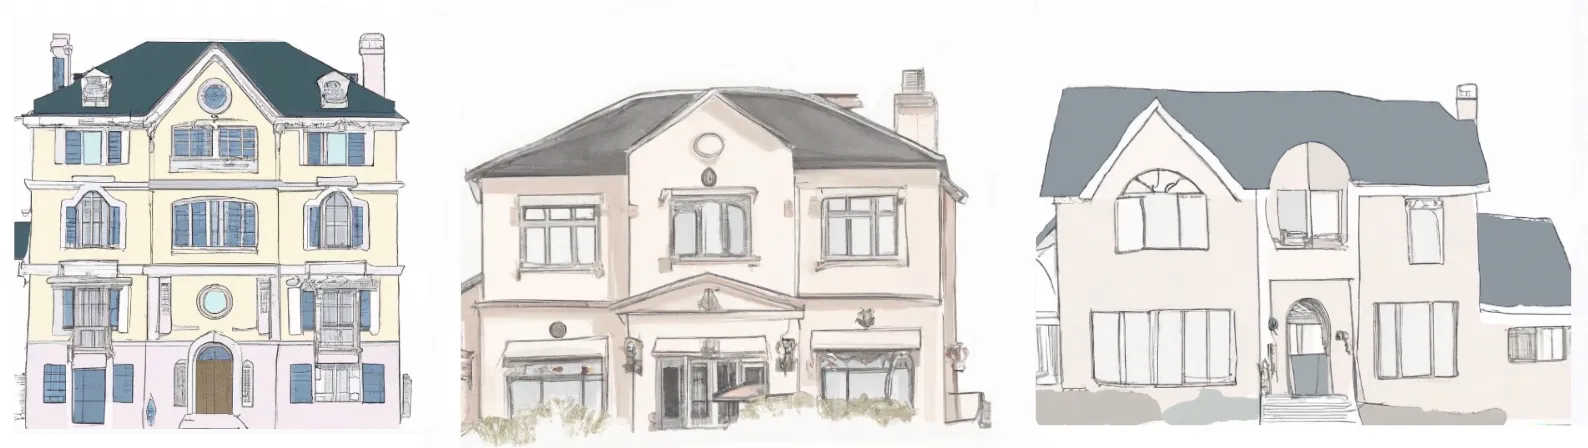

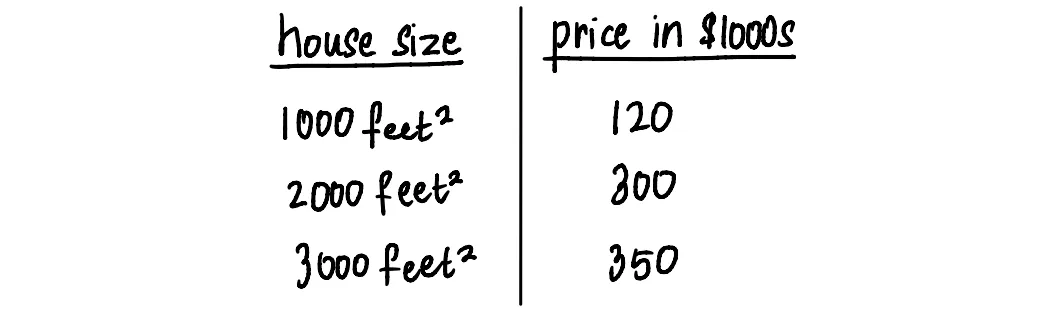

si graficamos los datos

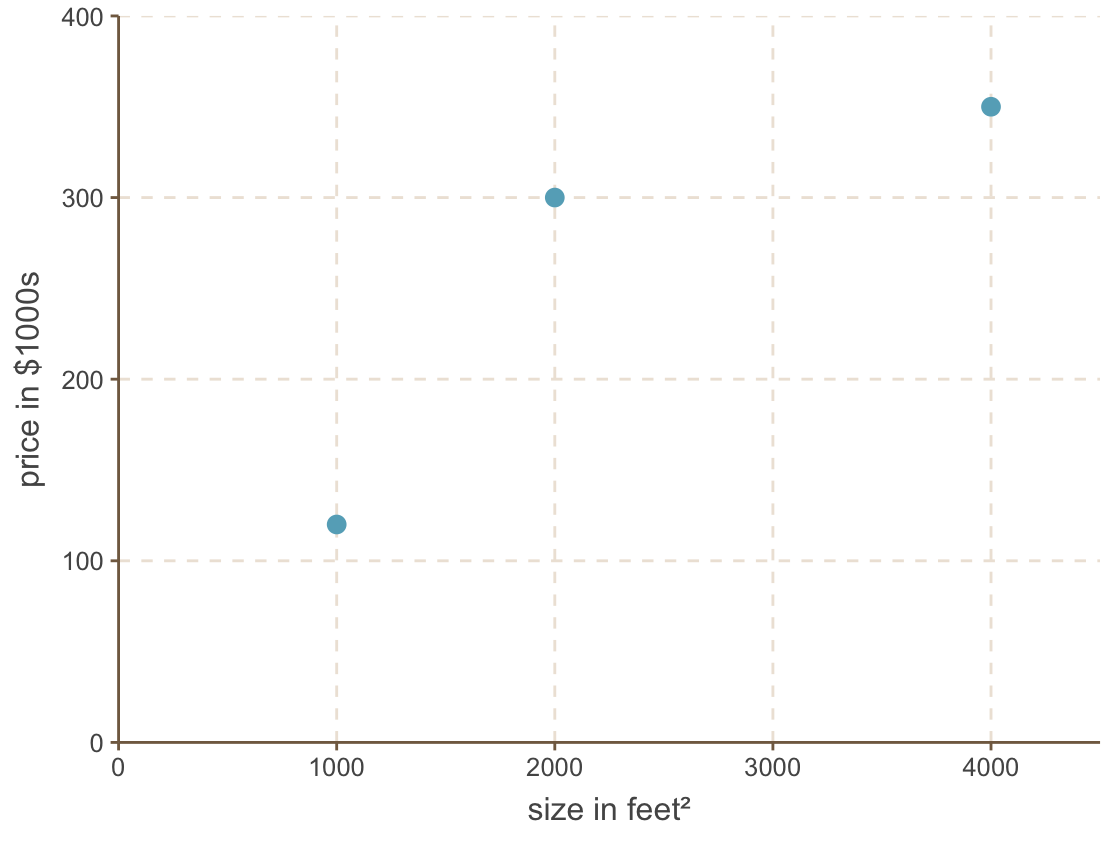

Al examinar los datos, el **precio** de una casa parece estar relacionado con el **tamaño** de esta. 

Y esta relación parece ser lineal. Para encontrar esta *línea* utilizaremos un Regresión lineal, llamado Mínimos cuadrados Ordinarios MCO. 

Esto implica dibujar una línea en un diagrama de dispersión que mejor represente el patrón de los puntos de datos. Nuestro modelo podría verse así:

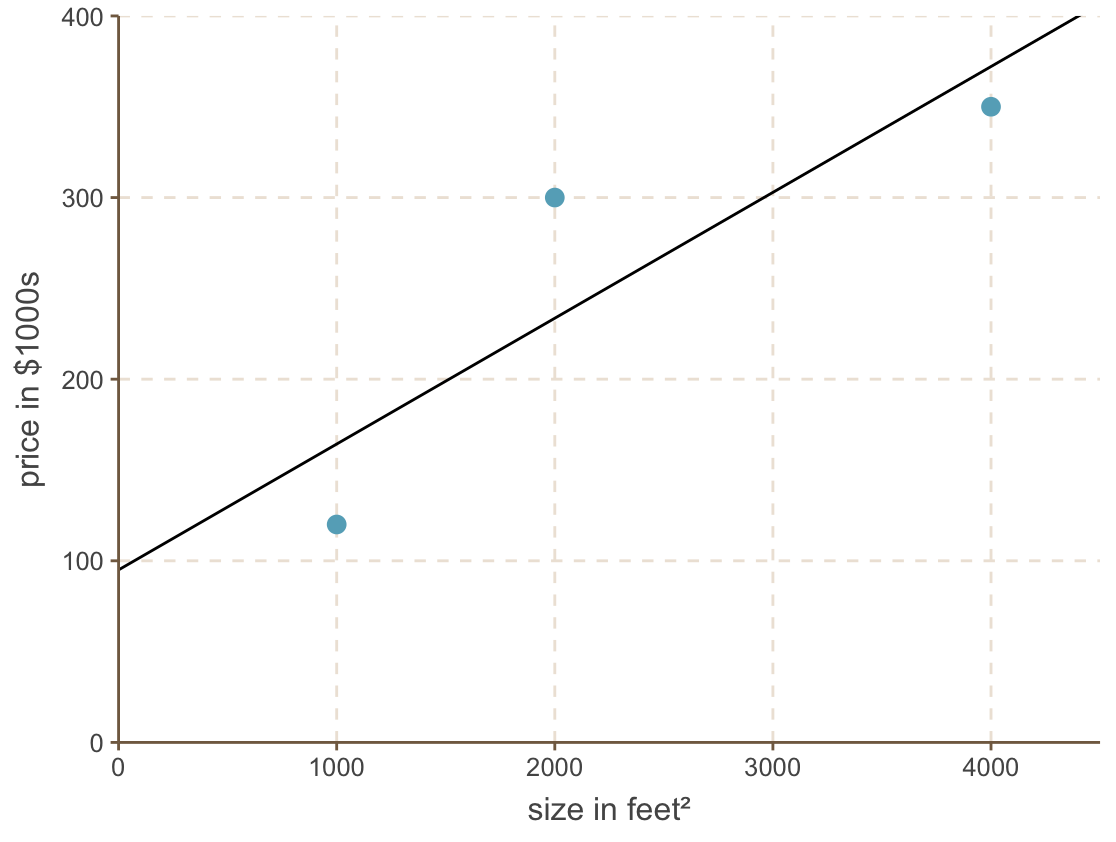

Con esta línea podemos encontrar el precio al que debería vender nuestro amigo su casa.

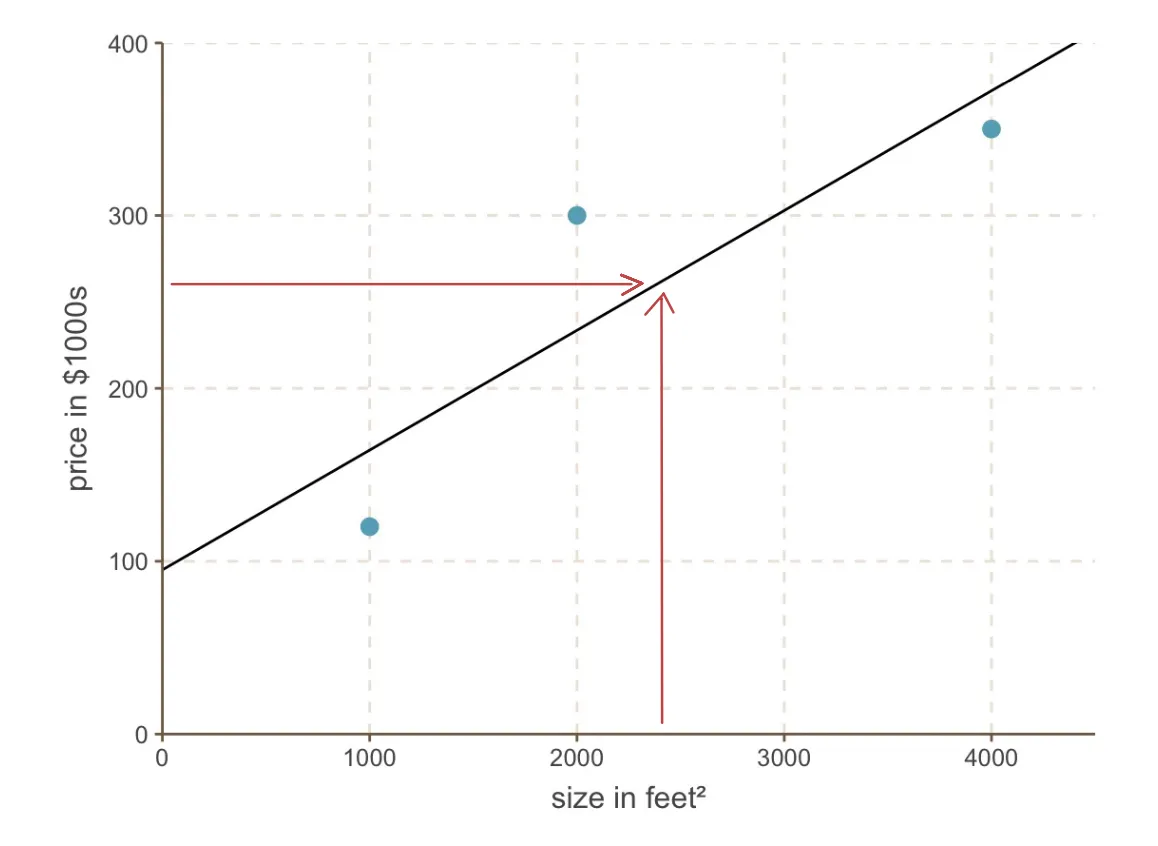

El resultado es alrededor de 260,000 

La pregunta es por qué esa línea o cómo encontramos esa línea.

Por ejemplo la línea de la siguiente imagen parece que podría funcionar

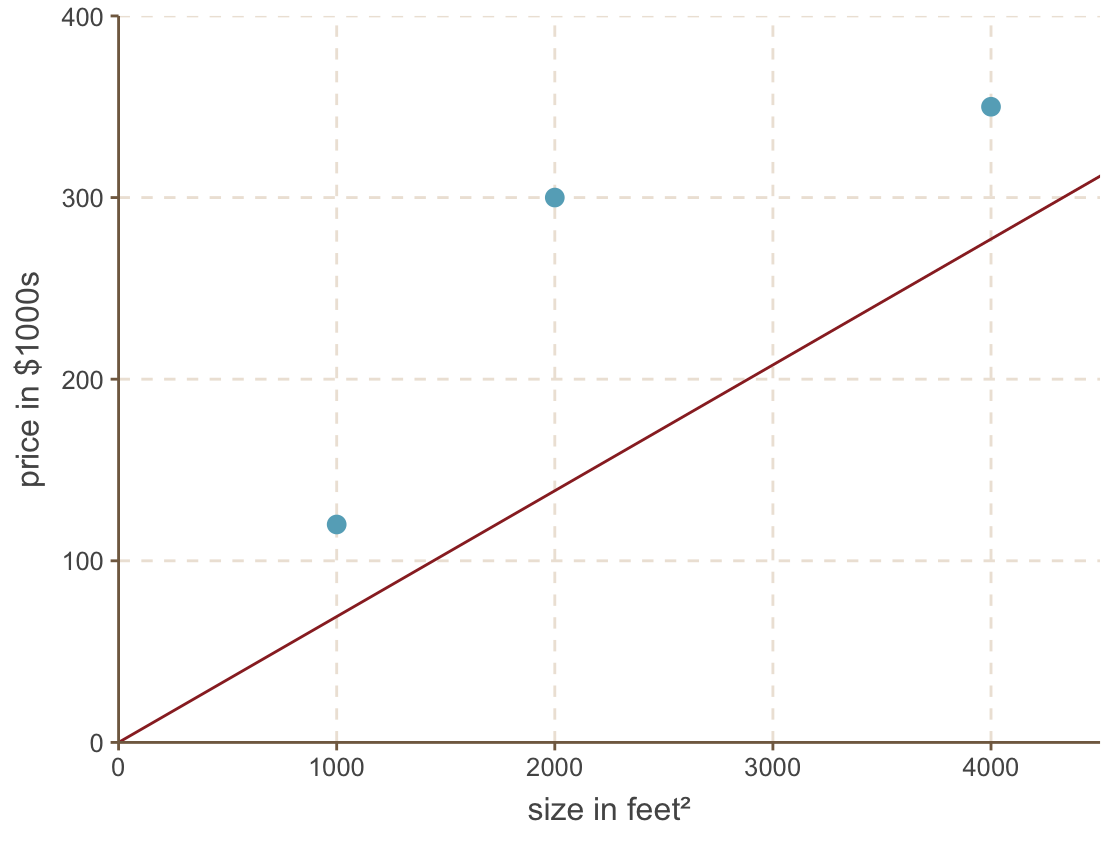

note comó esta línea queda  muy alejada de los puntos

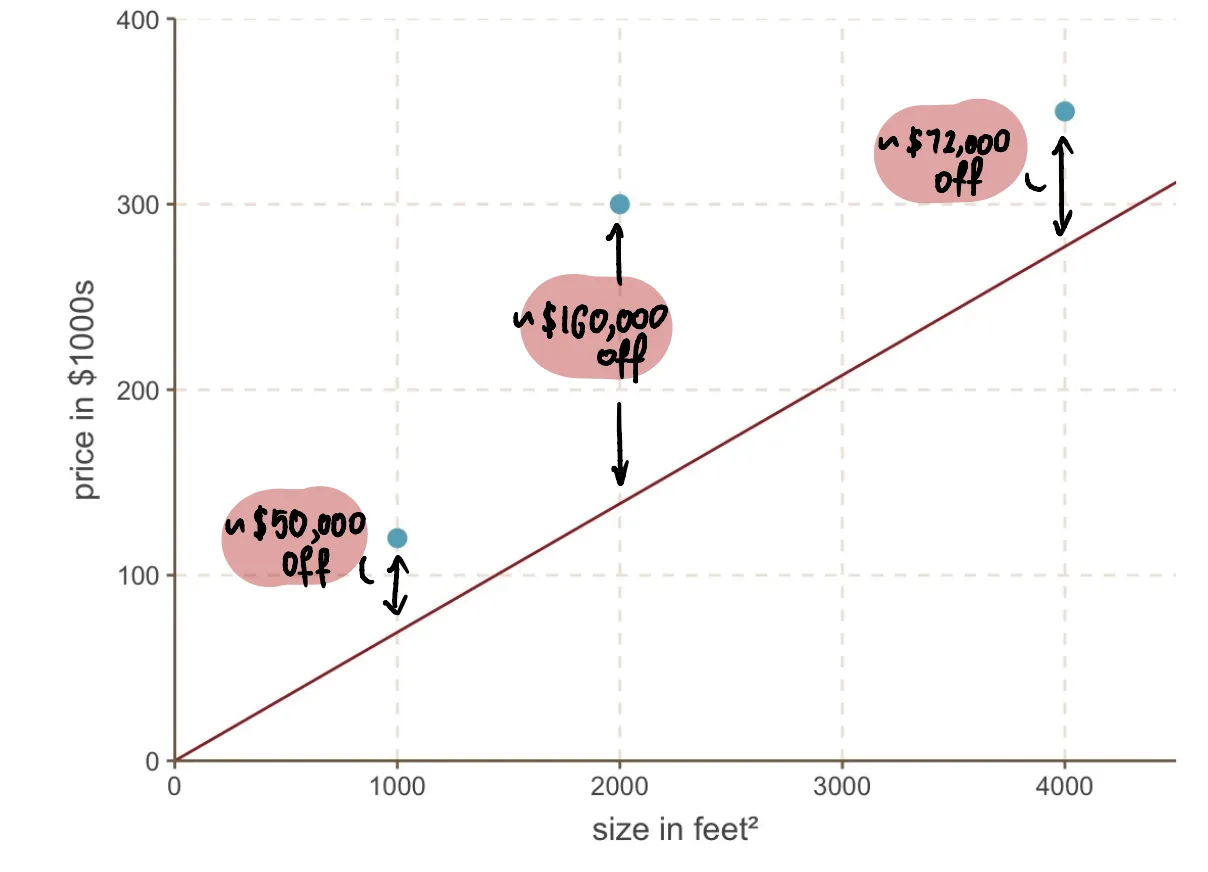

En cambio nuestra primer línea estimada (MCO) queda en medio y cerca de todos los puntos

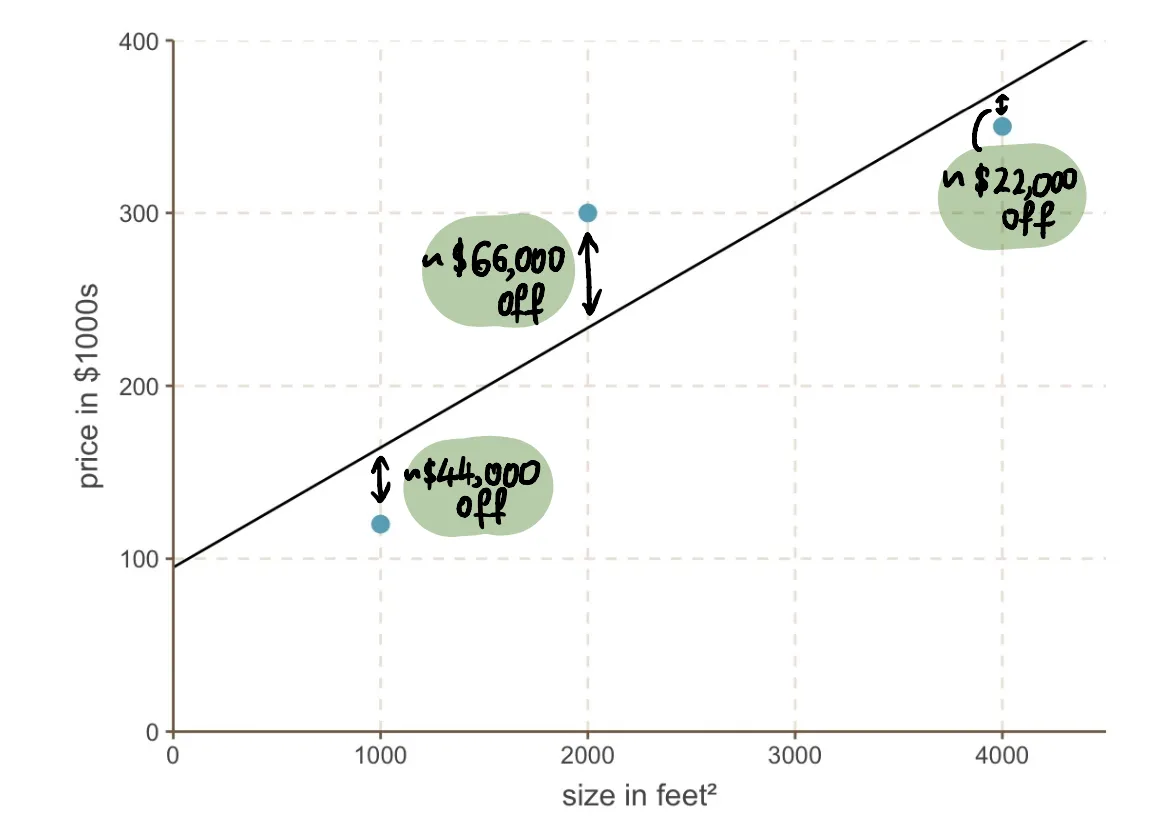

la ecuación obtenida por MCO es 

$ y = intercepto + 0.069 * size$

$ precio \:casa = intercepto + 0.069 * size$

Y la interpretación es: **en promedio por cada pie cuadrado el valor de la casa se incrementa en 0.069 mil dólares** 

estimemos un modelo en python

In [ ]:
## importamos datos
## https://raw.githubusercontent.com/jaime-escobedo-tec/SeriesDeTiempo-Tec/main/casas.csv


casas = pd.read_csv('https://raw.githubusercontent.com/jaime-escobedo-tec/SeriesDeTiempo-Tec/main/casas.csv')

In [ ]:
casas.head()

,tamaño_m2,precio
0,36.384871,6.585568e+06
1,58.549714,8.352843e+06
2,49.023231,8.678035e+06
3,28.860638,8.386701e+06
4,27.622514,5.965969e+06


In [ ]:
## vemos contenido de dataframe


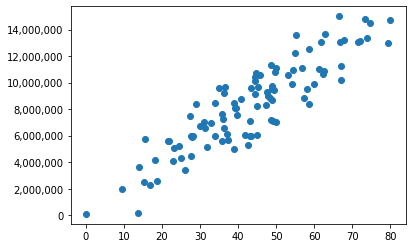

In [ ]:
## graficamos
plt.scatter(casas['tamaño_m2'], casas['precio'])
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'));

In [ ]:
### estimamos el modelo
import statsmodels.formula.api as smf


In [ ]:
reg = smf.ols(formula='precio~tamaño_m2',data=casas)
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           2.21e-36
Time:                        14:06:49   Log-Likelihood:                -1560.9
No. Observations:                 100   AIC:                             3126.
Df Residuals:                      98   BIC:                             3131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.055e+05   4.08e+05      1.728      0.0

Rechazamos Ho, por lo tanto su hay efecto del tamaño de la casa sobre el precio, en promedio por cada metro cuadrado la casa incrementa su valor en 175,900.